In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Exercise 1 - A Graph

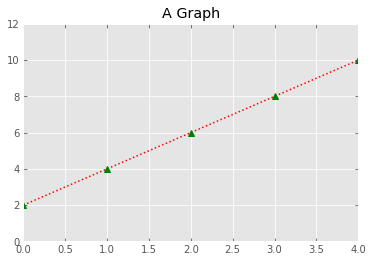

In [5]:
y_coords = list(range(2, 12, 2))

a_graph = plt.subplot()
a_graph.set_title("A Graph")
a_graph.set_ylim([0, 12])
a_graph.plot(y_coords, 'r:', y_coords, 'g^')
a_graph.tick_params(axis = 'both', direction = 'in', top = True, right = True)
a_graph.margins(0)

# Exercise 2 - Digits Frequency Histogram

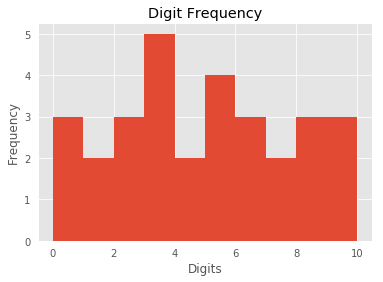

In [4]:
numbers = pd.read_csv('digits.txt', header = None, squeeze = True)

plt.style.use('ggplot')
plt.hist(numbers, range = (0, 10))
plt.title('Digit Frequency')
plt.ylabel('Frequency')
plt.xlabel('Digits')
plt.tick_params(left = False, bottom = False)
plt.show()

# Excercise 3 - Wealth Distribution Horizontal Stacked Bar Chart

In [4]:
columns = ['Percentages', 'Actual', 'Estimated', 'Ideal']
percentages = ['Bottom 20%', '4th 20%', 'Middle 20%', '2nd 20%', 'Top 20%']

actual = [0, 0, 5, 11, 84]
estimated = [3, 6, 13, 20, 58]
ideal =[11, 14, 21, 22, 32]

data=list(zip(percentages, actual,estimated,ideal))

wealthdist_df = pd.DataFrame(data)
wealthdist_df.columns = columns
wealthdist_df.set_index('Percentages', inplace = True)
del wealthdist_df.index.name

wealthdist_df = wealthdist_df.T.iloc[:, ::-1].iloc[::-1]

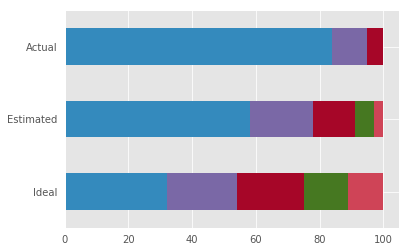

In [5]:
with plt.style.context('ggplot'):
    wealthdist_df.plot(kind='barh', stacked = True, legend = False,
                  color=['#348ABD', '#7A68A6', '#A60628', '#467821', '#CF4457'])
    plt.tick_params(left = False, bottom = False)

# Exercise 4 - Fortune 500 Median By Year

In [6]:
fortune500_df = pd.read_csv('fortune500.csv', na_values = 'N.A.')
fortune500_df.replace({',':''},regex=True, inplace = True)
fortune500_df['Profit (in millions)'] = fortune500_df['Profit (in millions)'].astype(float)

fortune500_df = pd.DataFrame(fortune500_df.groupby('Year')['Profit (in millions)'].median())
fortune500_df = fortune500_df['Profit (in millions)']

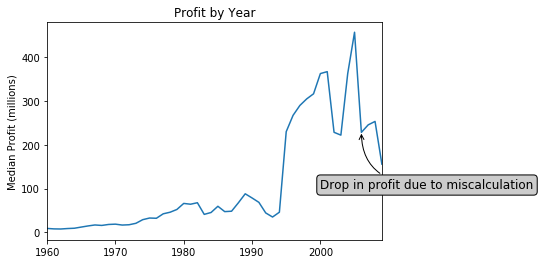

In [7]:
plt.plot(fortune500_df)

plt.title("Profit by Year")
plt.xlim([1960, 2009])
plt.ylabel("Median Profit (millions)")
plt.annotate('Drop in profit due to miscalculation', xy = (2006, 230),
            xytext = (2000, 100), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
            size = 12,
            bbox=dict(boxstyle="round", fc="0.8"))
plt.show()

# Exercise 5 - Egg Weights Histogram

In [ ]:
% Grade Min. Weight (oz)
small 1.5
medium 1.75
large 2
extra large 2.25
jumbo 2.5

In [8]:
egg_weights = [1.21, 1.82, 1.9, 1.31, 2.45, 2.2, 1.4, 2.74, 2.99, 2.38]
bins = [1.5, 1.75, 2, 2.25, 2.5, 3]
grades = ['small', 'medium', 'large', 'extra large', 'jumbo']

In [9]:
cats = pd.cut(egg_weights, bins, labels = grades)

In [10]:
eggcounts_df = pd.value_counts(cats).reset_index()

In [11]:
columns = ['% Grade', 'Min. Weight (oz)']

grades = ['small', 'medium', 'large', 'extra large', 'jumbo']
min_weights = [1.50, 1.75, 2.00, 2.25, 2.50]

data = list(zip(grades, min_weights))

In [12]:
eggweights_df = pd.DataFrame(data)
eggweights_df.columns = columns

In [13]:
eggweights_df.set_index('% Grade', inplace = True)

In [14]:
merged_df = eggweights_df.merge(eggcounts_df, left_index = True, right_on = 'index')

In [15]:
test_df = merged_df[['index', 0]]

In [16]:
testdf2 = merged_df[['Min. Weight (oz)', 0]]

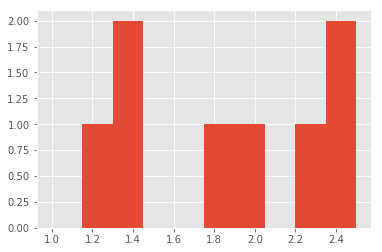

In [18]:
with plt.style.context('ggplot'):

    plt.hist(egg_weights, range = (1.00, 2.50))

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(testdf2[0], labels=test_df['Min. Weight (oz)'],
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

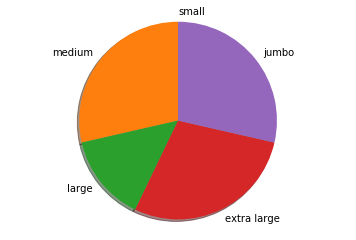

In [124]:
fig1, ax1 = plt.subplots()
ax1.pie(test_df[0], labels=test_df['index'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [122]:
merged_df[['Min. Weight (oz)', 0]].plot(kind = 'pie')

ValueError: pie requires either y column or 'subplots=True'

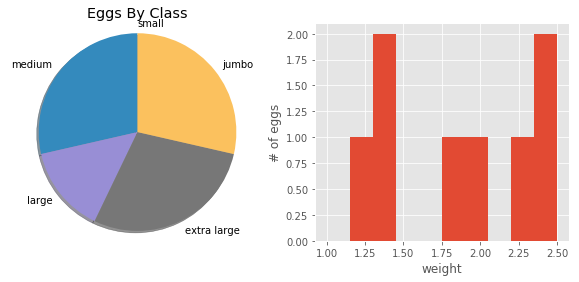

In [24]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    ax1 = ax[0]
    ax2 = ax[1]

    ax1.pie(test_df[0], labels=test_df['index'], shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title("Eggs By Class")
    
    ax2.hist(egg_weights, range = (1.00, 2.50))
    ax2.set_ylabel("# of eggs")
    ax2.set_xlabel("weight")
    

plt.show()

# Exercise 6 - Plot Tax Rates

In [25]:
def plot_tax_rates(filename, list_of_countries):
    
    corptax_df = pd.read_csv(filename)
    corptax_df = corptax_df[['TIME', 'LOCATION', 'Value']]
    countries = list_of_countries
    
    individual_countries = []
    for country in countries:
        individual_countries.append(corptax_df[corptax_df['LOCATION'] == country])
        
    individual_tax = pd.concat(individual_countries, axis = 0)
    all_countries = individual_tax.groupby('TIME').mean()
    
    with plt.style.context('ggplot'):

        fig, ax = plt.subplots(1, 2, figsize = (10, 4))
        ax1 = ax[0]
        ax2 = ax[1]
    
    for i in range(len(individual_countries)):
        ax1.plot(individual_countries[i]['TIME'], individual_countries[i]['Value'], label = max(individual_countries[i]['LOCATION']))
    ax1.set_title("Country Tax Rate")
    ax1.set_xlim(2000, 2015)
    ax1.set_xlabel("TIME")
    ax1.legend()

    ax2.plot(all_countries)
    ax2.set_xlim(2000, 2015)
    ax2.set_title("Group Avg Tax Rate")
    ax2.set_xlabel("TIME")

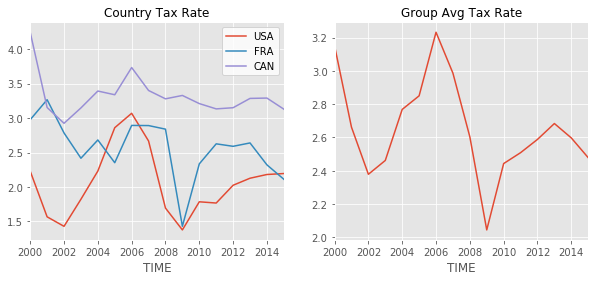

In [26]:
plot_tax_rates('corp_tax.csv', ['USA', 'FRA', 'CAN'])

In [11]:
corptax_df = pd.read_csv(filename)

corptax_df = corptax_df[['TIME', 'LOCATION', 'Value']]
countries = ['USA', 'FRA', 'CAN']

In [12]:
individual_countries = []
for country in countries:
    individual_countries.append(corptax_df[corptax_df['LOCATION'] == country])

In [13]:
individual_tax = pd.concat(individual_countries, axis = 0)
all_countries = individual_tax.groupby('TIME').mean()

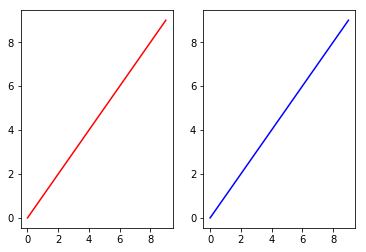

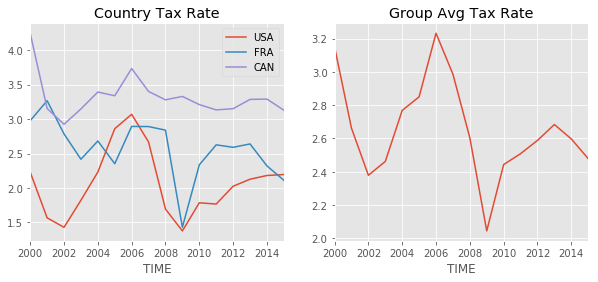

In [38]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    ax1 = ax[0]
    ax2 = ax[1]
    
    for i in range(len(individual_countries)):
        ax1.plot(individual_countries[i]['TIME'], individual_countries[i]['Value'], label = max(individual_countries[i]['LOCATION']))
    ax1.set_title("Country Tax Rate")
    ax1.set_xlim(2000, 2015)
    ax1.set_xlabel("TIME")
    ax1.legend()

    ax2.plot(all_countries)
    ax2.set_xlim(2000, 2015)
    ax2.set_title("Group Avg Tax Rate")
    ax2.set_xlabel("TIME")

In [15]:
plt.style.use('ggplot')
plt.show()

In [149]:
type(max(individual_countries[0]['LOCATION']))

str

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(range(10), 'r')
ax[1].plot(range(10), 'b')